In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [19]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

In [3]:
# 한글 깨짐 현상을 해결
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
with open('../dataset/BIGCON_DATA_ver1.2/SK_DATA.bin', 'rb') as f:
    sk_data = pickle.load(f) 
with open('../dataset/BIGCON_DATA_ver1.2/SH_DATA.bin', 'rb') as f:
    sh_data = pickle.load(f) 
    
# sk 데이터
sk_age = sk_data['SK_AGE']
sk_time = sk_data['SK_TIME']

# sh 데이터
sh_resident = sh_data['SH_RESIDENT']
sh_foreign = sh_data['SH_FOREIGN']

* [SCORE](#SCORE)
* [sk](#sk)
* [sh](#sh)
* [corr](#corr-함수)
* [main](#main)
* [scatter plot](#scatter-plot)

# Score

In [39]:
score_data= pd.read_excel('../dataset/COVID/score_dataset.xlsx')
score_data.rename(columns= {'Unnamed: 0': 'DATE'}, inplace= True)

# covid interval 추가
# 상위 50퍼센트 미만: 0명 - 27명 1점
# 상위 50퍼센트 이상 20퍼센트 미만: 28명 - 107명 3점
# 상위 20퍼센트 이상 10퍼센트 미만: 108명 - 242명 6점
# 상위 10퍼센트 이상 5퍼센트 미만: 243명 - 505명 10점
# 상위 5퍼센트 이상: 506명 - 15점
score_data['covid_interval'] = pd.qcut(score_data.확진자수, [0,0.5,0.8,0.9,0.95,1], labels= [1,3,6,10,20])
score_data.covid_interval = score_data.covid_interval.astype('int64')

# 요일 추가
score_data['YO'] = score_data['DATE'].map(lambda x: x.weekday())

# MinMaxScaling
scaler= MinMaxScaler()
scaled_score_data = score_data.copy()
scaled_score_data[['격리중','격리해제','검사중','결과음성','big','small','확진자수','covid_interval']]= scaler.fit_transform(score_data[['격리중','격리해제','검사중','결과음성','big','small','확진자수','covid_interval']])

In [40]:
# Scoring
scaled_score_data['SCORE'] = 1-(scaled_score_data['확진자수']*0.75 + scaled_score_data['격리중']*0.125 + scaled_score_data['검사중']*0.125 - scaled_score_data['결과음성']*0.125 - scaled_score_data['격리해제']*0.125)

In [41]:
pd.set_option('display.max_rows', 121)
scaled_score_data

,DATE,격리중,격리해제,검사중,결과음성,big,small,확진자수,covid_interval,YO,SCORE
0,2020-02-01,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000942,0.000000,5,0.999294
1,2020-02-02,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.002825,0.000000,6,0.997881
2,2020-02-03,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0,1.000000
3,2020-02-04,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000942,0.000000,1,0.999294
4,2020-02-05,0.000000,0.000000,0.000000,0.000000,0.00,0.166667,0.002825,0.000000,2,0.997881
5,2020-02-06,0.000000,0.000000,0.000000,0.000000,0.00,0.166667,0.003766,0.000000,3,0.997175
6,2020-02-07,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000942,0.000000,4,0.999294
7,2020-02-08,0.002945,0.000192,0.017438,0.059856,0.00,0.000000,0.000000,0.000000,5,1.004958
8,2020-02-09,0.002945,0.000288,0.027000,0.016875,0.00,0.000000,0.002825,0.000000,6,0.996284
9,2020-02-10,0.003213,0.000288,0.022753,0.033128,0.00,0.000000,0.000000,0.000000,0,1.000931


In [42]:
# 월요일
scaled_score_data_mon= scaled_score_data.query('YO==0')

# 화요일
scaled_score_data_tue= scaled_score_data.query('YO==1')

# 수요일
scaled_score_data_wed= scaled_score_data.query('YO==2')

# 목요일
scaled_score_data_thu= scaled_score_data.query('YO==3')

# 금요일
scaled_score_data_fri= scaled_score_data.query('YO==4')

# 토요일
scaled_score_data_sat= scaled_score_data.query('YO==5')

# 일요일
scaled_score_data_sun= scaled_score_data.query('YO==6')

#### sk

In [8]:
# 유동인구 일별 그래프
def sksk(df, flag, code):
    
    if flag:
        sk_s = df.query('(SI_CODE==@code)')
    else:
        sk_s = df
        
    age_col_list = sk_s.columns.values.tolist()
    age_col_list = age_col_list[7:22]

    temp_df = pd.DataFrame(sk_s.groupby(['DATE'])[age_col_list].sum())
    temp_df = temp_df.sum(axis=1)
    temp_df = temp_df.to_frame(name='Popul')
    pop_df = temp_df.reset_index()
    pop_df['YO'] = pop_df['DATE'].map(lambda x: x.weekday())
    
    # 2020년만 해당하도록 함
    pop_20 = pop_df.tail(121)
    
    # 그래프 보고싶으면 주석처리 빼기
#     draw(pop_20, 'DATE', 'Popul')
    
    return pop_20

#### sh

In [9]:
# 매출액 일별 그래프
def shsh(df, flag, code):
    
    if flag:
        sh_s = df.query('(SI_CODE==@code)')
    else:
        sh_s = df
    
    temp_df = pd.DataFrame(sh_s.groupby(['DATE'])['USE_AMT'].sum())
    amt_df = temp_df.reset_index()
    amt_df['YO'] = amt_df['DATE'].map(lambda x: x.weekday())
    
    # 2020년만 해당하도록 함
    amt_20 = amt_df.tail(121)
    
    # 그래프 보고싶으면 주석처리 빼기
#     draw(amt_20, 'DATE', 'USE_AMT')
    
    return amt_20

In [10]:
def draw(df, x_col, y_col):
    label = df[x_col]
    index = range(len(label))

    plt.figure(figsize=(30,10))
    plt.plot(index, df[y_col], '>-')
    plt.xticks(index[::7], label[::7], rotation='45')
    plt.grid(axis='x')
    plt.show()

#### corr 함수

In [11]:
def corr(dataframe, sk_dataframe, sh_dataframe, title):
    
    # Series로 넣는 경우는 .tolist()가 필요
    # list로 넣는경우는 .tolist() 삭제
    origin = pd.DataFrame({'covid':dataframe.tolist(), 'pop':sk_dataframe.tolist(), 'amt':sh_dataframe.tolist()})
    origin_df = origin.corr()

    plt.figure(figsize=(8,8))

    mask = np.zeros_like(origin_df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(origin_df, annot=True, fmt = '.2f', linewidths=.5, cmap='RdYlBu_r', mask=mask, annot_kws={"fontsize":15})
    plt.title(title)
    plt.show()

### main

In [12]:
# 유동인구 

# 2020년 전체(서울+대구)
total_sk = sksk(sk_age, False, '00')

# 2020년 서울
seoul_sk = sksk(sk_age, True, '11')

# 2020년 대구
daegu_sk = sksk(sk_age, True, '27')

In [13]:
# 매출액

# 2020년 전체(서울+대구)
total_sh = shsh(sh_resident, False, '00')

# 2020년 서울
seoul_sh = shsh(sh_resident, True, '11')

# 2020년 대구
daegu_sh = shsh(sh_resident, True, '27')

In [14]:
# 전체 유동인구
# 월요일
total_sk_mon= total_sk.query('YO==0')
# 화요일
total_sk_tue= total_sk.query('YO==1')
# 수요일
total_sk_wed= total_sk.query('YO==2')
# 목요일
total_sk_thu= total_sk.query('YO==3')
# 금요일
total_sk_fri= total_sk.query('YO==4')
# 토요일
total_sk_sat= total_sk.query('YO==5')
# 일요일
total_sk_sun= total_sk.query('YO==6')

In [15]:
# 전체 매출액
# 월요일
total_sh_mon= total_sh.query('YO==0')
# 화요일
total_sh_tue= total_sh.query('YO==1')
# 수요일
total_sh_wed= total_sh.query('YO==2')
# 목요일
total_sh_thu= total_sh.query('YO==3')
# 금요일
total_sh_fri= total_sh.query('YO==4')
# 토요일
total_sh_sat= total_sh.query('YO==5')
# 일요일
total_sh_sun= total_sh.query('YO==6')

# 요일별 Heatmap

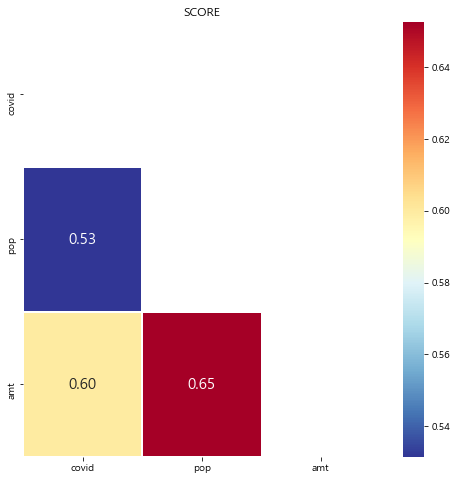

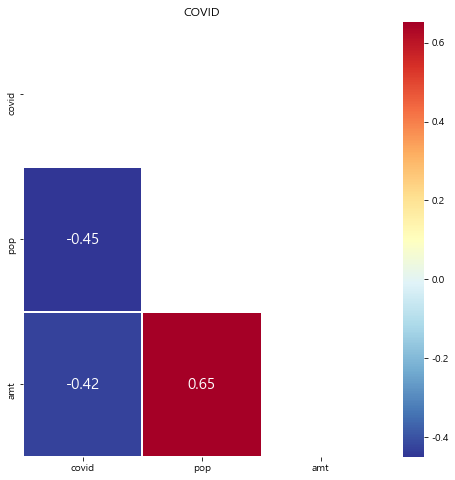

In [43]:
# 전체
corr(scaled_score_data['SCORE'], total_sk['Popul'], total_sh['USE_AMT'], 'SCORE')
corr(scaled_score_data['확진자수'], total_sk['Popul'], total_sh['USE_AMT'], 'COVID')

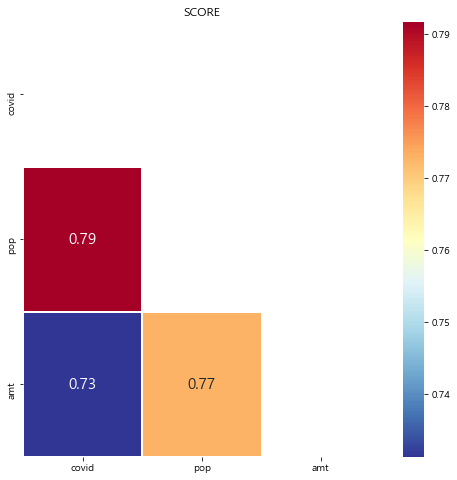

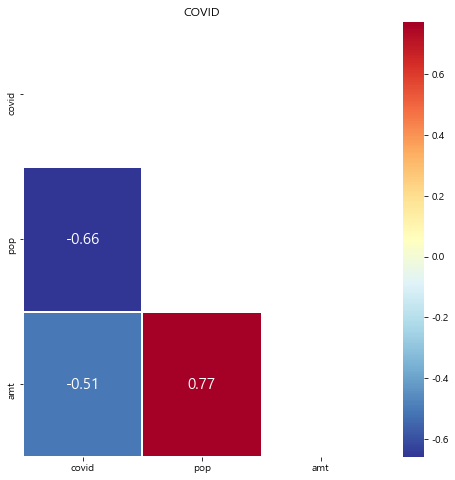

In [44]:
# 월요일
corr(scaled_score_data_mon['SCORE'], total_sk_mon['Popul'], total_sh_mon['USE_AMT'], 'SCORE')
corr(scaled_score_data_mon['확진자수'], total_sk_mon['Popul'], total_sh_mon['USE_AMT'], 'COVID')

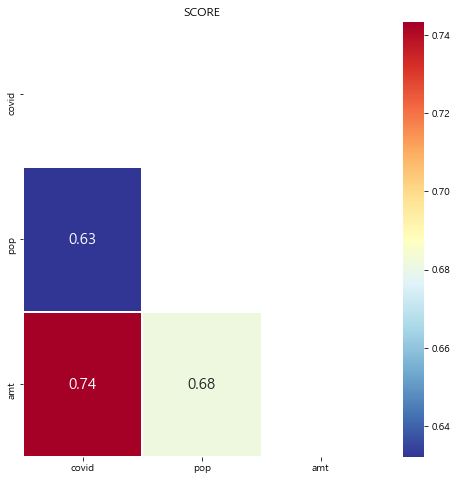

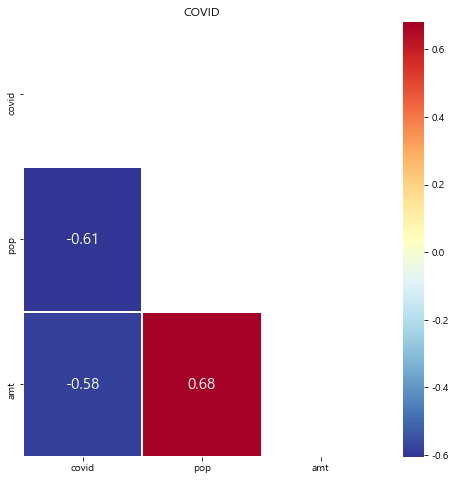

In [45]:
# 화요일
corr(scaled_score_data_tue['SCORE'], total_sk_tue['Popul'], total_sh_tue['USE_AMT'], 'SCORE')
corr(scaled_score_data_tue['확진자수'], total_sk_tue['Popul'], total_sh_tue['USE_AMT'], 'COVID')

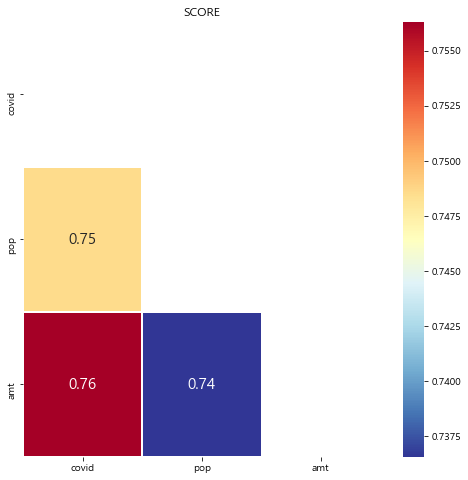

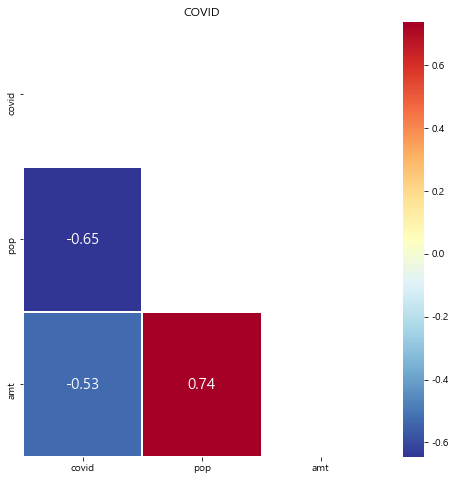

In [47]:
# 수요일
corr(scaled_score_data_wed['SCORE'], total_sk_wed['Popul'], total_sh_wed['USE_AMT'], 'SCORE')
corr(scaled_score_data_wed['확진자수'], total_sk_wed['Popul'], total_sh_wed['USE_AMT'], 'COVID')

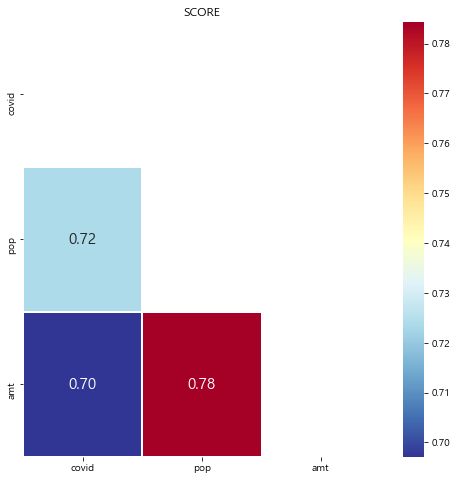

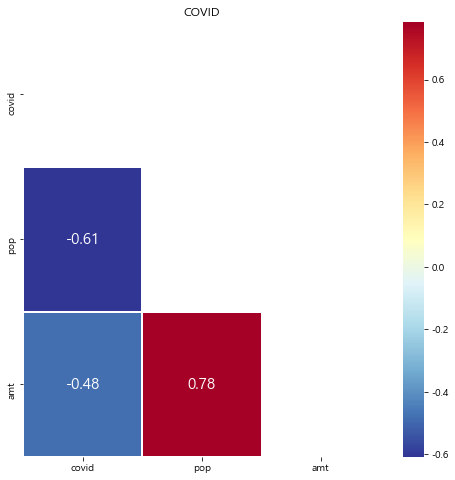

In [48]:
# 목요일
corr(scaled_score_data_thu['SCORE'], total_sk_thu['Popul'], total_sh_thu['USE_AMT'], 'SCORE')
corr(scaled_score_data_thu['확진자수'], total_sk_thu['Popul'], total_sh_thu['USE_AMT'], 'COVID')

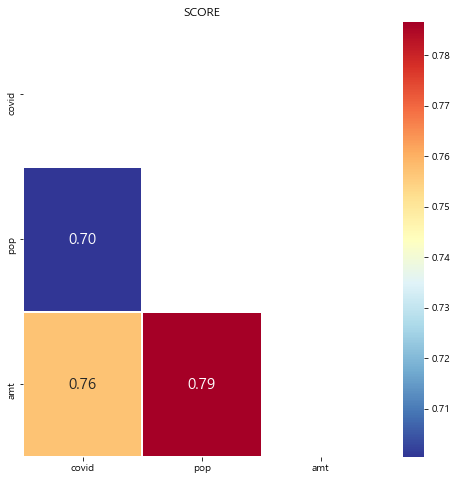

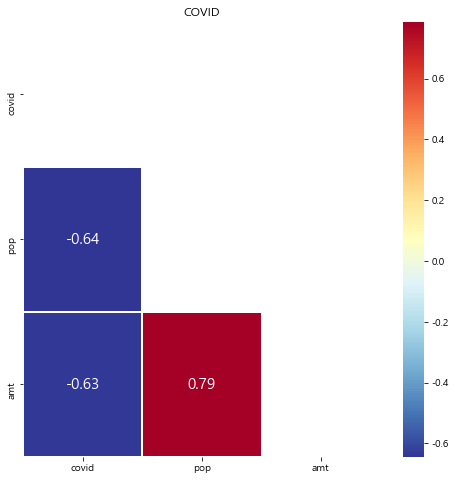

In [49]:
# 금요일
corr(scaled_score_data_fri['SCORE'], total_sk_fri['Popul'], total_sh_fri['USE_AMT'], 'SCORE')
corr(scaled_score_data_fri['확진자수'], total_sk_fri['Popul'], total_sh_fri['USE_AMT'], 'COVID')

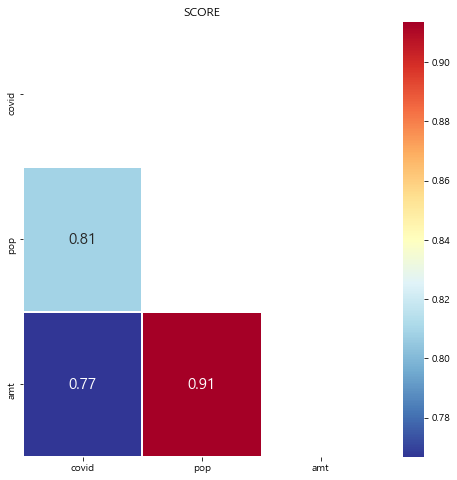

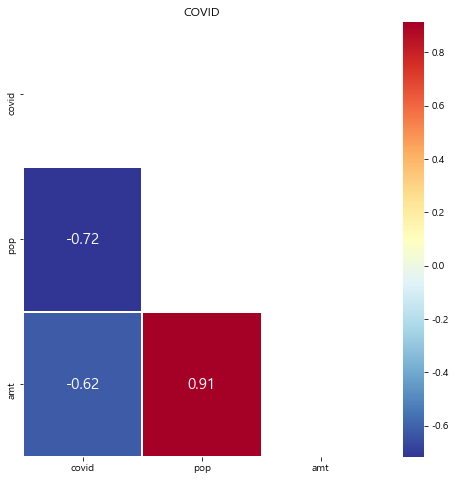

In [50]:
# 토요일
corr(scaled_score_data_sat['SCORE'], total_sk_sat['Popul'], total_sh_sat['USE_AMT'], 'SCORE')
corr(scaled_score_data_sat['확진자수'], total_sk_sat['Popul'], total_sh_sat['USE_AMT'], 'COVID')

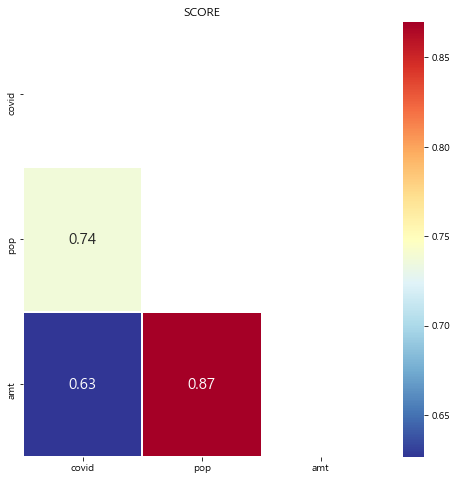

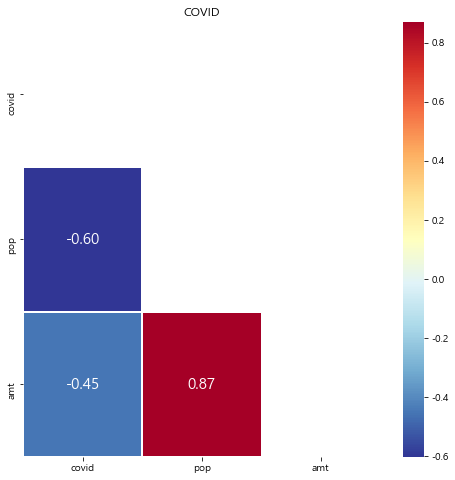

In [51]:
# 일요일
corr(scaled_score_data_sun['SCORE'], total_sk_sun['Popul'], total_sh_sun['USE_AMT'], 'SCORE')
corr(scaled_score_data_sun['확진자수'], total_sk_sun['Popul'], total_sh_sun['USE_AMT'], 'COVID')

In [53]:
def scatter(df1, df2, x_col, y_col):
    plt.figure(figsize=(20,20))
    df1['DATE'] = df1['DATE'].astype(str)
    df2['DATE'] = df2['DATE'].astype(str)
    
    sns.scatterplot(x=x_col, 
                    y=y_col, 
                    s=100, # marker size
                    data = pd.merge(df1, df2, on='DATE'))

    plt.show()

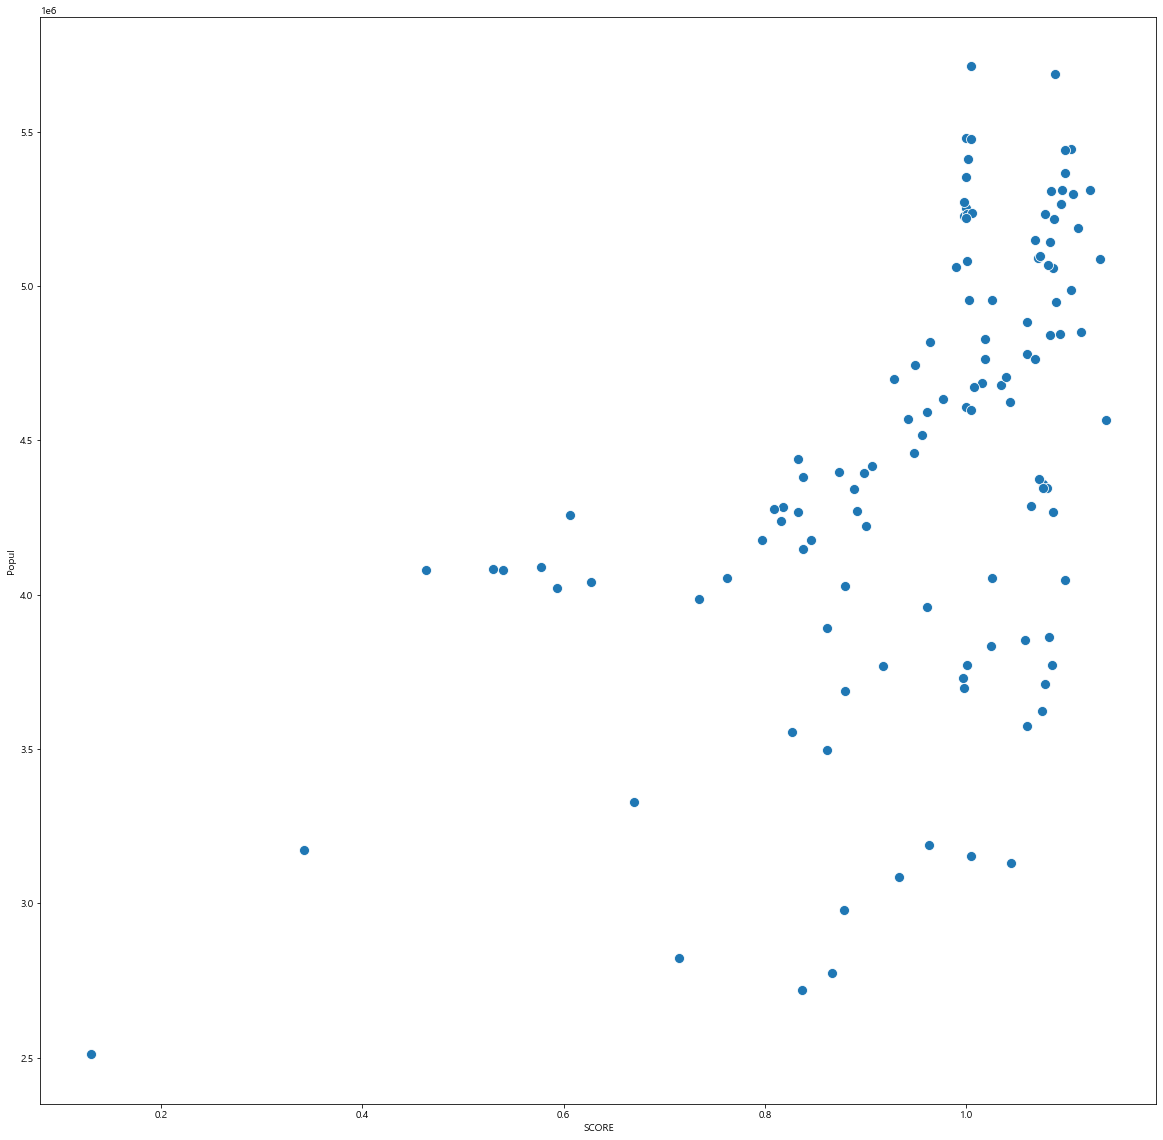

In [54]:
# Event score와 Population scatterplot
scatter(scaled_score_data, total_sk, 'SCORE', 'Popul')

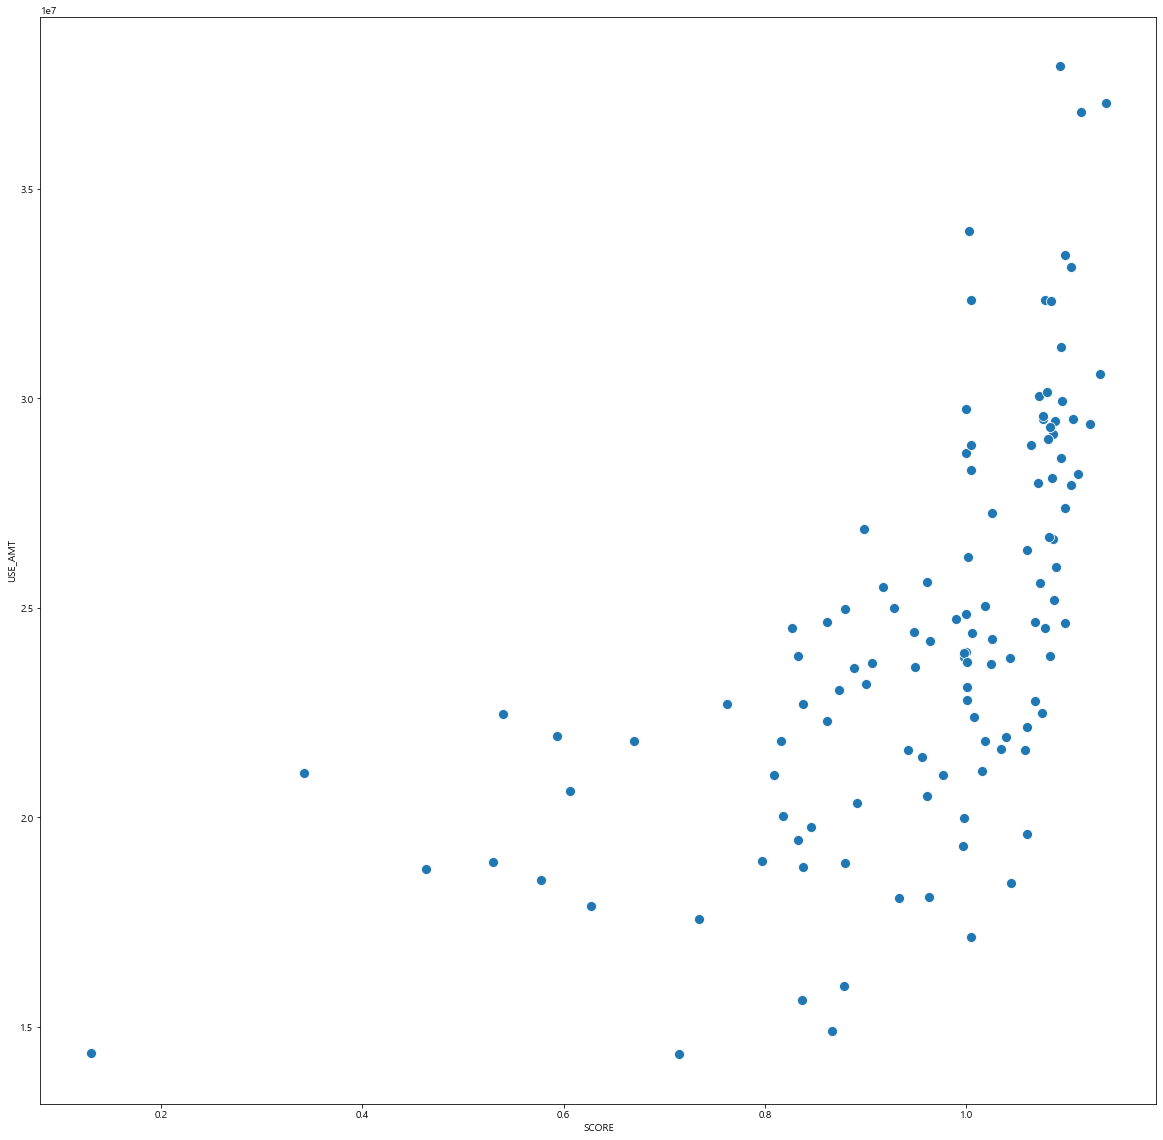

In [55]:
# Event score와 USE_AMT scatterplot
scatter(scaled_score_data, total_sh, 'SCORE', 'USE_AMT')